# **Extracción y Estructuración de información sobre Proyectos de Ley del Congreso del Perú**

# Introducción
El presente laboratorio tiene como finalidad introducir al alumno en las herramientas básicas y más utiles para la extracción y información y almacenamiento que forma que permita su posterior análisis y procesamiento. 

Para esto serán descargados los datos referente a más de 2000 proyectos ley y sus metadatos. Las informaciones disponibilizadas en la página web del congreso se encuentran escaneadas por lo cual herramientas de OCR serán necesarias para reconocer texto ne imagenes escaneadas.
<br/>


# **Paso 1: Análisis de datos estructurados disponibles en la web de congreso**
En la página web de proyectos de ley del congreso: 

https://wb2server.congreso.gob.pe/spley-portal/#/expediente/search

podemos descargar el documento excel clicando en el boton exportar. Despues de descargar colocar el archivo en el folder de trabajo del google colab y abrir el documentos usando la biblioteca pandas:

In [39]:
import pandas as pd
from datetime import datetime
df = pd.read_excel('ReporteProyectosLey.xlsx', skiprows=4)
df['Fecha de Presentación']=df['Fecha de Presentación'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
df.head()

,Proyecto de Ley,Fecha de Presentación,Título,Estado,Proponente,Autores
0,02388/2021-CR,2022-06-17,LEY QUE INTEGRA Y OPTIMIZA LOS PROCESOS DE FOR...,Presentado,Congreso,"Camones Soriano, Lady Mercedes; García Correa..."
1,02387/2021-CR,2022-06-17,LEY QUE CREA LA UNIDAD DE GESTIÓN INTEGRAL DE ...,Presentado,Congreso,"Ciccia Vásquez, Miguel Ángel; Cueto Aservi, J..."
2,02386/2021-CR,2022-06-17,LEY QUE MODIFICA EL NUMERAL 17.6 DEL ARTÍCULO ...,Presentado,Congreso,"Cueto Aservi, José Ernesto; Montoya Manrique,..."
3,02385/2021-CR,2022-06-17,"LEY QUE REGULA EL CULTIVO, PRODUCCIÓN, COMERCI...",Presentado,Congreso,"Soto Reyes, Alejandro; Díaz Monago, Freddy Ro..."
4,02384/2021-CR,2022-06-17,LEY QUE MODIFICA EL ARTÍCULO 186° Y 195° DEL D...,Presentado,Congreso,"Paredes Castro, Francis Jhasmina; Dávila Atan..."


In [40]:
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Proyecto de Ley,Fecha de Presentación,Título,Estado,Proponente,Autores
count,2388,2388,2388,2388,2388,1946
unique,2388,211,2371,16,12,1743
top,02388/2021-CR,2021-09-16 00:00:00,"LEY QUE MODIFICA LA LEY 30512, LEY DE INSTITUT...",En comisión,Congreso,"Calle Lobatón, Digna; Luna Gálvez, José León;..."
freq,1,63,4,1427,1961,15
first,NaN,2021-08-03 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2022-06-17 00:00:00,NaN,NaN,NaN,NaN


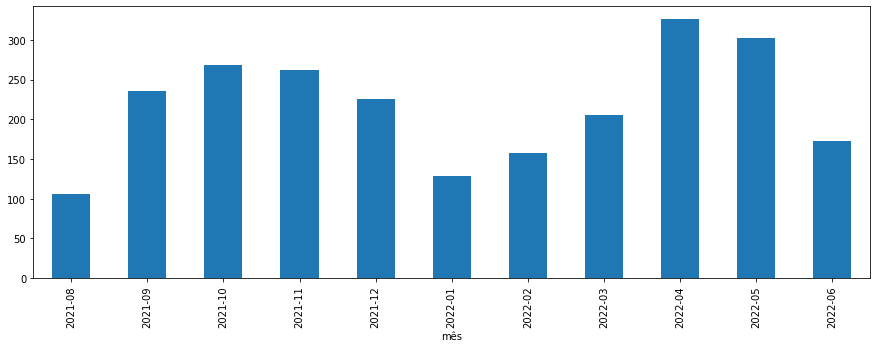

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
df['mês']=df['Fecha de Presentación'].dt.to_period("M")
df.groupby('mês').count()['Proyecto de Ley'].sort_index().plot(kind='bar')

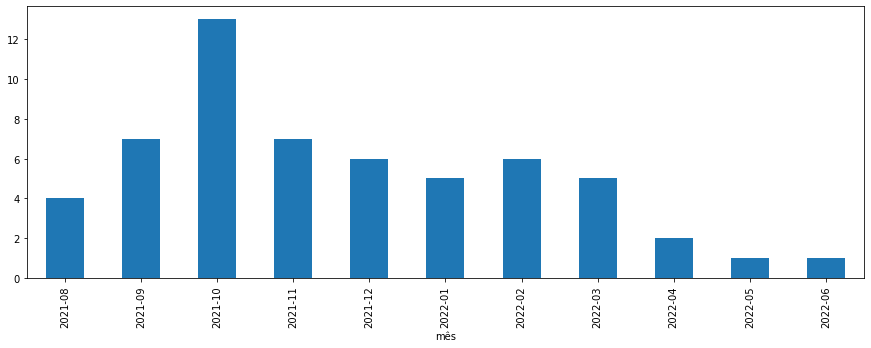

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
df[df['Estado']=='APROBADO'].groupby('mês').count()['Proyecto de Ley'].sort_index().plot(kind='bar')

#**Paso 2: Implementación del Web Scrapper**

Creación del link de descarga del documento PDF

In [59]:
import re

def get_url(x):
  match = re.match('(?P<code>\d{5})/(?P<year>\d{4})-\w{2}',x)
  url = f"https://wb2server.congreso.gob.pe/spley-portal/#/expediente/{match['year']}/{match['code']}"
  return url

df['url']=df['Proyecto de Ley'].apply(get_url)  

df.head()

,Proyecto de Ley,Fecha de Presentación,Título,Estado,Proponente,Autores,mês,url
0,02388/2021-CR,2022-06-17,LEY QUE INTEGRA Y OPTIMIZA LOS PROCESOS DE FOR...,Presentado,Congreso,"Camones Soriano, Lady Mercedes; García Correa...",2022-06,https://wb2server.congreso.gob.pe/spley-portal...
1,02387/2021-CR,2022-06-17,LEY QUE CREA LA UNIDAD DE GESTIÓN INTEGRAL DE ...,Presentado,Congreso,"Ciccia Vásquez, Miguel Ángel; Cueto Aservi, J...",2022-06,https://wb2server.congreso.gob.pe/spley-portal...
2,02386/2021-CR,2022-06-17,LEY QUE MODIFICA EL NUMERAL 17.6 DEL ARTÍCULO ...,Presentado,Congreso,"Cueto Aservi, José Ernesto; Montoya Manrique,...",2022-06,https://wb2server.congreso.gob.pe/spley-portal...
3,02385/2021-CR,2022-06-17,"LEY QUE REGULA EL CULTIVO, PRODUCCIÓN, COMERCI...",Presentado,Congreso,"Soto Reyes, Alejandro; Díaz Monago, Freddy Ro...",2022-06,https://wb2server.congreso.gob.pe/spley-portal...
4,02384/2021-CR,2022-06-17,LEY QUE MODIFICA EL ARTÍCULO 186° Y 195° DEL D...,Presentado,Congreso,"Paredes Castro, Francis Jhasmina; Dávila Atan...",2022-06,https://wb2server.congreso.gob.pe/spley-portal...


**Web Scrapping (Selenium)**: Para utilizar Selenium debemos instalar um webdriver. Este programa nos permitira manipular un browser mediante de en python.

In [ ]:
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

In [60]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from tqdm import tqdm
from glob import glob
import requests
import time
import os


options = webdriver.ChromeOptions()
options.add_argument("-headless")
options.add_argument("-no-sandbox")
options.add_argument("-disable-dev-shm-usage")
wd = webdriver.Chrome("chromedriver",options=options)
os.makedirs("pdf_data", exist_ok=True)

Cada alumno descarga una parte de la tabla. Despues juntaremos todo en un único repositório.

In [61]:
start = 0 
end = 10

la tarea de web scrapping consiste en 2 acciones que son realizadas a cada página url:

- Extracción de información de la tabla de Proyecto de Ley
- Descargar del PDF 

In [62]:
def get_general_info(wd):
  time.sleep(1)
  block = wd.find_element(by=By.XPATH, value=f'//div[@class="col-12 row ng-star-inserted"]')
  texts = [div.text for div in block.find_elements(by=By.TAG_NAME, value='div')]
  row = dict(text.split('\n') for text in texts if '\n' in text)
  return row

def download_pdf(wd):
  pdf_btn = wd.find_element(by=By.XPATH, value=f'//button[@class="btn btn-sm btn-light ng-star-inserted"]')
  pdf_btn.click()
  
  while True:
    time.sleep(1)
    pdf_names = glob('*.pdf')
    if pdf_names:
      pdf_name = pdf_names[0]
      os.rename(pdf_name, os.path.join("pdf_data",pdf_name))
      break

table = []
for url in tqdm(df.url.values[start:end]):
  wd.get(url)
  row = get_general_info(wd)
  download_pdf(wd)
  table.append(row)

100%|██████████| 10/10 [01:01<00:00,  6.15s/it]


Las informaciones extraidas de las tablas de proyecto de ley de cada url son almazenadas en un archivo xlsx:

In [63]:
import pandas as pd
pd.DataFrame(table).to_excel(f'proyectos_de_ley_{start}_{end}.xlsx', index=False)

# **Paso 3: Extracción de Texto en PDF de texto escaneado**

Configuración del ambiente para el uso de Tesseract en español

In [ ]:
%%bash

pip install pytesseract
apt-get install poppler-utils 
pip install pdf2image
sudo apt-get install -y tesseract-ocr
sudo apt-get install tesseract-ocr-spa

Funciones auxiliares para conversion de pdf a imagen y extracción de texto a partir de imagen;

In [1]:
def convert_pdf_to_images(pdf_path):
  from pdf2image import pdfinfo_from_path,convert_from_path
  pdf_name = os.path.basename(pdf_path).split('.')[0]
  out_path = os.path.join('doc_images',pdf_name)
  os.makedirs(out_path, exist_ok=True)

  info = pdfinfo_from_path(pdf_path, userpw=None, poppler_path=None)
  maxPages = info["Pages"]
  for page_nb in range(1, maxPages+1, 10) : 
      pages = convert_from_path(pdf_path, dpi=500, first_page=page_nb, last_page = min(page_nb+10-1,maxPages))   
      for id,page in tqdm(enumerate(pages), total=len(pages)):
          id_total = id + page_nb
          output_image_path = os.path.join(out_path,f'out_{id_total}.jpg')
          page.save(output_image_path, 'JPEG')

def extract_text_from_image(pdf_path):
  import pytesseract
  from pytesseract import Output
  import cv2
  from glob import glob
  os.makedirs('doc_text', exist_ok=True)
  
  pdf_name = os.path.basename(pdf_path).split('.')[0]
  out_path = os.path.join('doc_images',pdf_name)

  img_paths = glob(os.path.join(out_path,f'out_*.jpg'))
  texts = []
  for img_path in tqdm(sorted(img_paths, key=lambda x: int(os.path.basename(x).split('_')[1].split('.')[0]))):
    image = cv2.imread(img_path)
    image = image[700:5200,:]
    results = pytesseract.image_to_string(image, lang='spa')
    data = [line for line in results.split('\n') if line.strip()!='']
    texts+=data

  pdf_name = os.path.basename(pdf_path).split('.')[0]
  out_path = os.path.join('doc_text',f"{pdf_name}.txt")
  with open(out_path,'w+')  as file:
    file.write('\n'.join(texts))

In [6]:
from glob import glob
from tqdm import tqdm
import os

In [7]:
pdf_paths = glob(os.path.join('pdf_data','*.pdf'))
for pdf_path in pdf_paths:
  convert_pdf_to_images(pdf_path)
  extract_text_from_image(pdf_path)

100%|██████████| 17/17 [03:22<00:00, 11.90s/it]


In [8]:
!zip -r /content/doc_text_${start}_${end}.zip /content/doc_text

  adding: content/doc_text/ (stored 0%)
  adding: content/doc_text/PL0238320220617.txt (deflated 67%)
  adding: content/doc_text/PL0238520220617.txt (deflated 68%)
  adding: content/doc_text/PL0237920220616.txt (deflated 69%)
  adding: content/doc_text/PL0238120220617.txt (deflated 62%)
  adding: content/doc_text/PL0238720220617.txt (deflated 63%)
  adding: content/doc_text/PL0238020220616.txt (deflated 58%)
  adding: content/doc_text/PL0238620220617.txt (deflated 63%)
  adding: content/doc_text/PL0238220220617.txt (deflated 63%)
  adding: content/doc_text/PL0238420220617.txt (deflated 60%)
  adding: content/doc_text/PL0238817062022.txt (deflated 69%)
